## SIFT
Implement the SIFT algorithm to detect and match key points between two images.


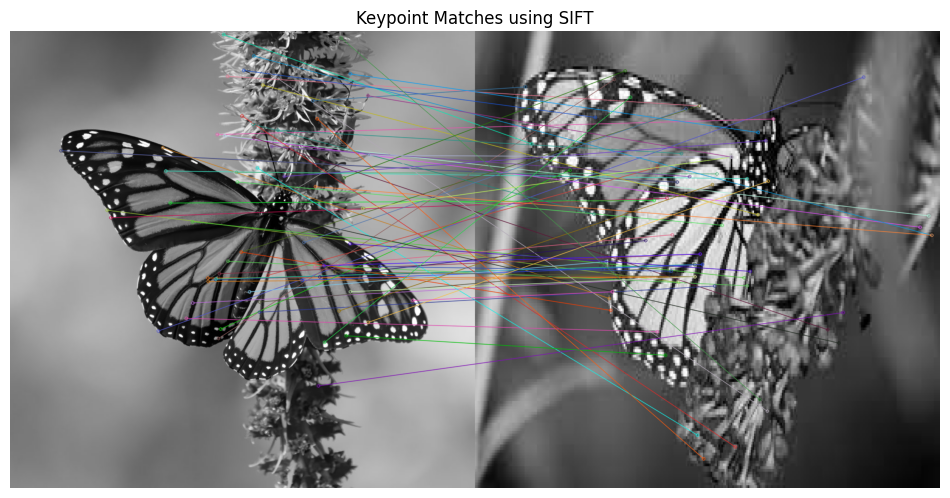

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in grayscale
img1 = cv2.imread('/content/image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/image2.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images are loaded correctly
if img1 is None or img2 is None:
    print("Error: Unable to load images. Check file paths.")
else:
    # Resize second image to match the first image's size (optional)
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]), interpolation=cv2.INTER_AREA)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Use FLANN-based matcher (better for images of different sizes)
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    # Apply Lowe's Ratio Test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Draw matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the result
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Keypoint Matches using SIFT")
    plt.show()



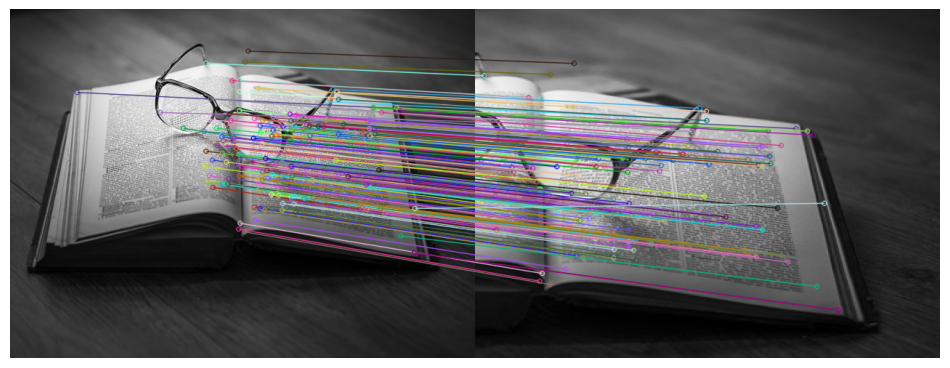

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in grayscale
img1 = cv2.imread('/content/image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/image2.jpg', cv2.IMREAD_GRAYSCALE)
# Display Original Images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Original Image 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Original Image 2")
plt.axis("off")
plt.show()


# Check if images are loaded correctly
if img1 is None or img2 is None:
    print("Error: Unable to load images. Check file paths.")
else:
    # Resize second image to match the first image's size (optional)
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]), interpolation=cv2.INTER_AREA)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Use FLANN-based matcher (better for images of different sizes)
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    # Apply Lowe's Ratio Test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Draw matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the result
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
